In [1]:
import pandas as pd

In [2]:
meta = ["recovered", "confirmed","deaths"]
data = [pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_{}_global.csv".format(i),error_bad_lines=False)  for i in meta]

In [3]:
scope = ["Italy","Spain","Turkey"]

In [4]:
scopeData = []

for i in scope:
    data_ = data[2][data[2]["Country/Region"] == i].iloc[: , list(range(4,73))].transpose().reset_index()
    data_.columns = ["Date","Quantity"]
    scopeData.append(data_)

In [5]:
Italy  = scopeData[0][scopeData[0].Quantity != 0].reset_index(drop=True)
Spain  = scopeData[1][scopeData[1].Quantity != 0].reset_index(drop=True)
Turkey = scopeData[2][scopeData[2].Quantity != 0].reset_index(drop=True)

In [6]:
withoutZerosData = [Italy,Spain,Turkey]

In [7]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,5)

Text(0, 0.5, '#')

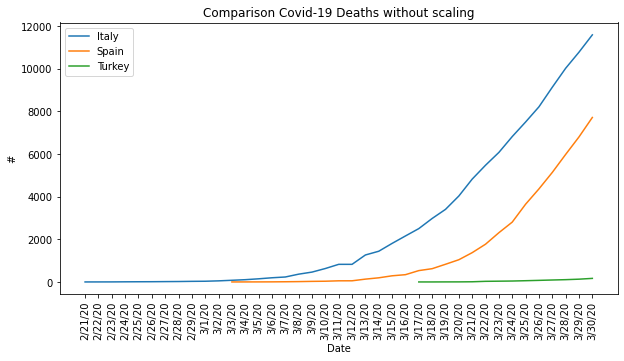

In [8]:
for i in withoutZerosData:
    
    plt.plot(i.Date,i.Quantity)
    
    plt.xticks(rotation='vertical')
plt.legend( scope)
plt.title("Comparison Covid-19 Deaths without scaling")
plt.xlabel("Date")
plt.ylabel("#")


Text(0, 0.5, '#')

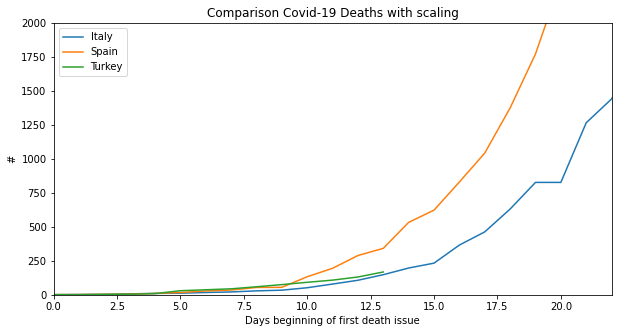

In [9]:
for i in withoutZerosData:
    
    plt.plot(i.Quantity)
    plt.ylim(0,2000)
    plt.xlim(0,22)
plt.legend( scope)
plt.title("Comparison Covid-19 Deaths with scaling")
plt.xlabel("Days beginning of first death issue")
plt.ylabel("#")
   